<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week10_BD_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

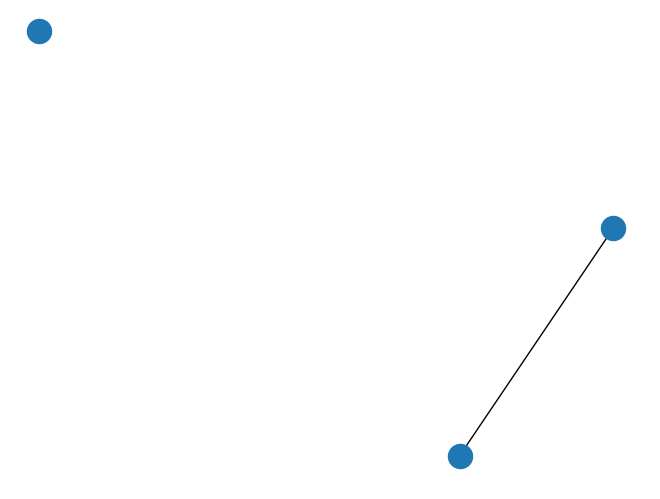

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#networkx 모듈 불러오기
import networkx as nx

#빈 undirected network를 생성(대소문자 주의)
G=nx.Graph()

#빈 directed network를 생성 (대소문자 주의)
D=nx.DiGraph()

#노드 1을 G에 추가
G.add_node(1)

#노드 'A'를 G에 추가
G.add_node('A')

#링크 (1,2)를 G에 추가 (노드가 없어도 가능)
G.add_edge(1,2)

'''
.add_node(node)
.add_edge(node1, node2)
'''


#그래프 그리는 함수
nx.draw(G)






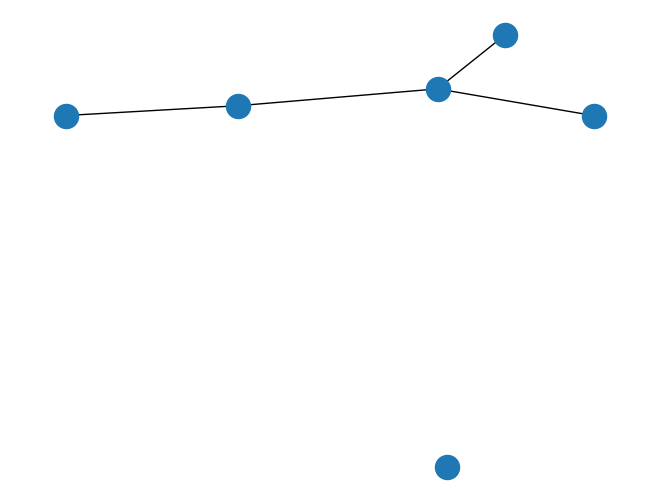

In [4]:
#여러 개의 노드를 동시에 추가
G.add_nodes_from([3,4,5])

#여러 개의 링크를 동시에 추가
G.add_edges_from([(2,3),(3,4),(3,5)])



'''
.add_node(node)
.add_edge(node1, node2)
.add_nodes_from(nodelist)
.add_edges_from(edgelist)
'''
nx.draw(G)

In [8]:
#모든 노드 보기 (return: nodeview)
G.nodes



NodeView((1, 'A', 2, 3, 4, 5))

In [9]:
for i in G.nodes:
  print(i,end=" ")

1 A 2 3 4 5 

In [11]:
#모든 링크 보기 (return: edgeview)
G.edges



EdgeView([(1, 2), (2, 3), (3, 4), (3, 5)])

In [12]:
for u,v in G.edges:
  print(u,v)

1 2
2 3
3 4
3 5


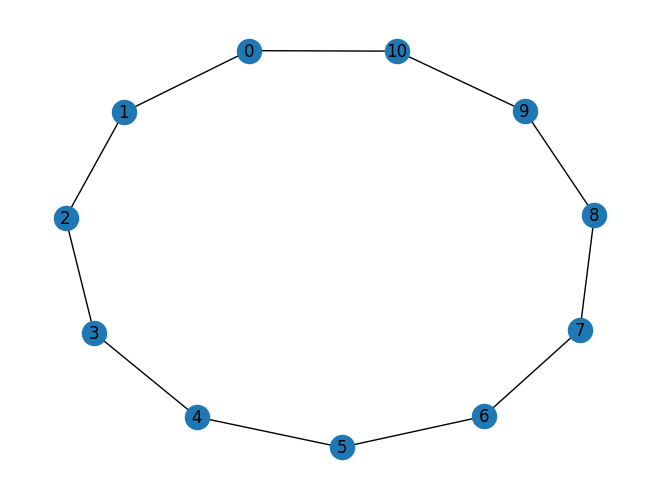

In [102]:
G=nx.Graph()

for i in range(10):
  G.add_edge(i,i+1)
  if i==9:
    G.add_edge(i+1,9-i)

nx.draw(G, with_labels=True)

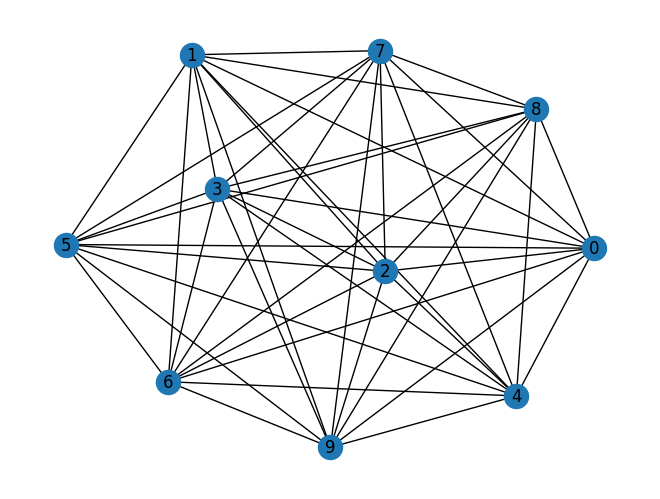

In [101]:
G=nx.Graph()
G.add_nodes_from(np.arange(10))
for i in range(10):
 for j in range(10):
  if i!=j:
    G.add_edge(i,j)
  else:
    continue


nx.draw(G, with_labels=True)


In [20]:
G.degree #각 노드별 Degree 보기 (return: degreeview)

DegreeView({0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9})

In [24]:
for i, deg in G.degree:
  print("node %d  : degree %d"%(i,deg))
'''
D.in_degree   Digraph에서의 in-degree

D.out_degree    Digraph에서의 out-degree
'''

node 0  : degree 9
node 1  : degree 9
node 2  : degree 9
node 3  : degree 9
node 4  : degree 9
node 5  : degree 9
node 6  : degree 9
node 7  : degree 9
node 8  : degree 9
node 9  : degree 9


'\nD.in_degree   Digraph에서의 in-degree\n\nD.out_degree    Digraph에서의 out-degree\n  '

In [40]:
D.in_degree


InDegreeView({})

In [41]:
D.out_degree

OutDegreeView({})

In [30]:
'''
각 노드별 Degree 보기 (return: degreeview)
노드 1의 degree 보기
'''
G.degree[2]


9

In [31]:
'''
노드 5의 neighbor 보기 (return: dict_keyiterator)
'''
G.neighbors(5)

In [65]:
G.neighbors

<bound method Graph.neighbors of <networkx.classes.graph.Graph object at 0x7c150742c4f0>>

In [35]:
for v in G.neighbors(5):
  print(v)

0
1
2
3
4
6
7
8
9


In [53]:
D.add_node(0)
D.add_edge(0,1)

list(D.successors(0))#DiGraph에서 5에서 이어진 노드 찾기(out)


[1]

In [54]:
list(D.predecessors(0))# DiGraph에서 5로 이어진 노드 찾기(in)

[]

In [56]:
#노드의수 출력
G.order()

11

In [58]:
len(G.nodes)

11

In [59]:
G.number_of_nodes()


11

In [60]:
#링크의수 출력
G.size()

45

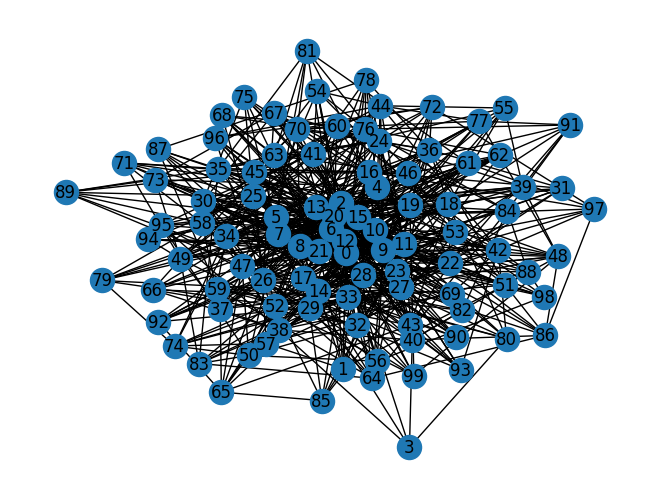

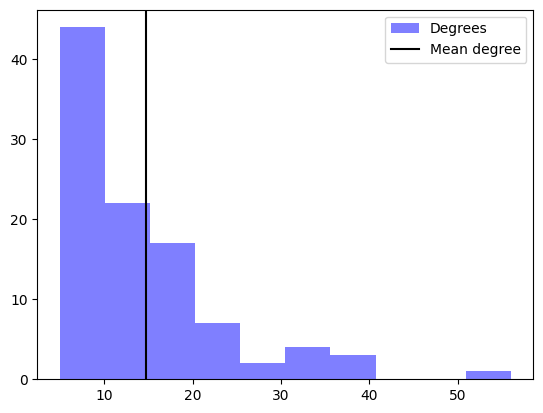

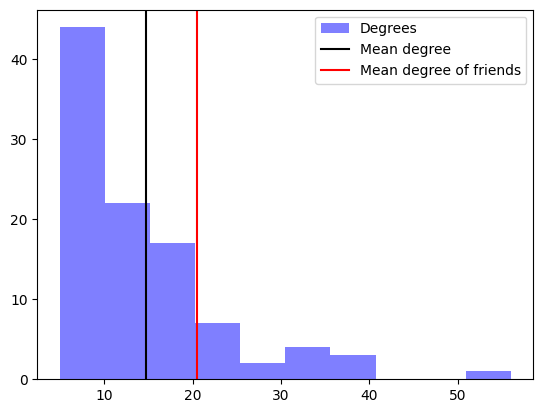

In [103]:
#Draw a Barabasi-Albert Graph.
G=nx.barabasi_albert_graph(100,8)#바라바시-알버트 그래프 생성: 100개의 노드로 구성된 네트워크를 생성하고, 각 새로운 노드가 기존의 8개 노드에 연결되도록 합니다.
nx.draw(G, with_labels=True)
plt.show()

#Plot histogram of number of neighbors(=number of friends).
degreelist=[deg for i,deg in G.degree]
plt.hist(degreelist,color='blue',alpha=0.5,label='Degrees')
'''
정도수 히스토그램: 각 노드의 정도수(연결된 이웃의 수)를 리스트로 추출하고, 이 데이터를 기반으로 히스토그램을 그립니다. 히스토그램에서 평균 정도수는 검은색 점선으로 표시합니다.
'''
plt.axvline(np.mean(degreelist),c='k',label='Mean degree')
plt.legend()
plt.show()

#(Friendship paradox) Calculate the mean degree of neighbors(=mean degree of friends).

neighborList=[]
# 각 노드의 이웃의 평균 연결 정도 계산

for node in G.nodes():
    # 현재 노드의 모든 이웃의 연결 정도를 가져옵니다.
    neighbors = G.neighbors(node)

    neighbor_degrees = [G.degree(neighbor) for neighbor in neighbors]

    if neighbor_degrees:  # 이웃이 존재하는 경우에만 평균을 계산
        average_neighbor_degree = np.mean(neighbor_degrees)
        neighborList.append(average_neighbor_degree)

plt.hist(degreelist,color='blue',alpha=0.5,label='Degrees')
plt.axvline(np.mean(degreelist),c='k',label='Mean degree')
plt.axvline(np.mean(neighborList),c='r',label='Mean degree of friends')
plt.legend()
plt.show()

바라바시-알버트(BA) 그래프는 통계역학의 관점에서 네트워크의 성장을 모델링하는 데 사용되는 알고리즘입니다.
이 모델은 알버트-라슬로 바라바시와 레카 알버트가 1999년에 개발했으며,
특히 "스케일-프리" 네트워크를 생성하는 데 사용됩니다.
스케일-프리 네트워크는 몇몇 노드들이 많은 연결을 가지고 대다수 노드는 소수의 연결만을 가진다는 특성을 가집니다.

바라바시-알버트 모델의 주요 특징




1.   **성장**: 네트워크는 초기에 몇 개의 노드로 시작해 점차적으로 노드가 추가되어 성장합니다.
2.   **선호적 연결**: 새로운 노드가 네트워크에 추가될 때, 기존 노드와의 연결 확률은 그 노드의 현재 연결 수(정도)에 비례합니다. 이는 "부익부 빈익빈" 또는 "많이 연결된 노드에 더 많이 연결된다"는 의미로, 인기 있는 노드가 더 많은 연결을 끌어들이는 경향을 모델링합니다.
3. **스케일-프리 네트워크**
스케일-프리 네트워크는 네트워크 내의 정도 분포가 멱법칙을 따르는 특성을 갖습니다. 멱법칙 분포란 소수의 노드가 대부분의 연결을 독점하는 현상으로, 이러한 분포를 가진 네트워크에서는 일부 노드가 매우 높은 연결성을 가집니다.



*예시*
인터넷, 사회 관계 네트워크, 인용 네트워크 등이 바라바시-알버트 모델로 잘 설명되는 예입니다. 예를 들어, 인터넷에서는 몇몇 웹사이트(구글, 페이스북 등)가 수많은 링크를 받는 반면, 대다수 웹사이트는 소수의 링크만을 가집니다.

바라바시-알버트 모델은 이와 같은 현상을 수학적으로 간단하면서도 현실적으로 타당하게 설명할 수 있어 널리 사용됩니다. 이 모델을 통해 다양한 현실 세계 네트워크의 성장과 진화를 이해하고 예측하는 데 도움을 줍니다.

In [69]:
#노드 1의 속성(attributes) 보기 (딕션 형식으로 정보 저장 가능)

G.nodes[1]

{}

In [72]:
#노드 1의 'name'에 1 저장
G.nodes[1]['name']=1

#노드 1의 속성 보기
G.nodes[1]

{'name': 1}

In [73]:
#노드 1의 'name' 보기
G.nodes[1]['name']

1

In [76]:
#링크 (0,1)의 'weight' 에 10 저장
G.edges[(0,1)]['weight']=10
G.edges[(0,1)]

{'weight': 10}

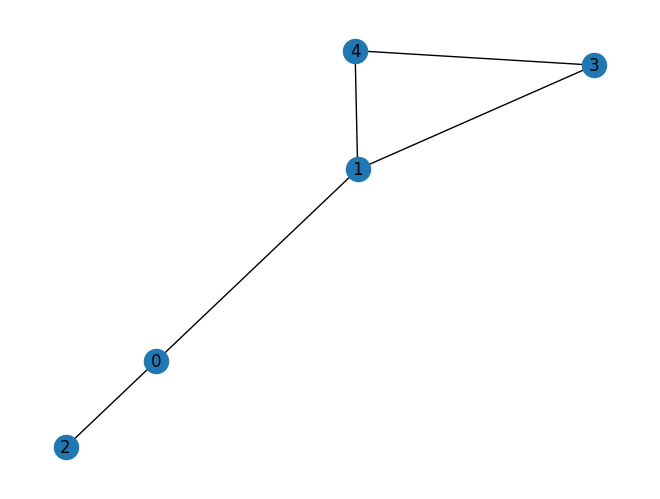

In [97]:
# 빈 그래프 객체 생성
G = nx.Graph()

#G.add_weighted_edges_from([(0,1,0.1),(0,2,0.5), (1,3,0.2), (3,4,0.9), (1,4,0.2)])

# 시작노드, 끝노드, 가중치(weight)를 포함하는 에지를 그래프에 추가
G.add_weighted_edges_from([
    (0, 1, 0.1),  # 노드 0에서 노드 1로 가는 가중치 0.1의 에지
    (0, 2, 0.5),  # 노드 0에서 노드 2로 가는 가중치 0.5의 에지
    (1, 3, 0.2),  # 노드 1에서 노드 3으로 가는 가중치 0.2의 에지
    (3, 4, 0.9),  # 노드 3에서 노드 4로 가는 가중치 0.9의 에지
    (1, 4, 0.2)   # 노드 1에서 노드 4로 가는 가중치 0.2의 에지
])
nx.draw(G,with_labels=True)

In [83]:
#edge를 출력할 때 weight를 함께 출력
G.edges(data='weight')

EdgeDataView([(0, 1, 0.1), (0, 2, 0.5), (1, 3, 0.2), (1, 4, 0.2), (3, 4, 0.9)])

In [88]:
#인접행렬 얻기 (scipy sparse array)
adj=nx.adjacency_matrix(G)
adj

<5x5 sparse array of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [89]:
print(adj)

  (0, 1)	0.1
  (0, 2)	0.5
  (1, 0)	0.1
  (1, 3)	0.2
  (1, 4)	0.2
  (2, 0)	0.5
  (3, 1)	0.2
  (3, 4)	0.9
  (4, 1)	0.2
  (4, 3)	0.9


In [91]:
adj=nx.to_numpy_array(G)
adj
#인접행렬 얻기 (numpy array)
#* weight가 포함된 경우 weight를 행렬로 반환

array([[0. , 0.1, 0.5, 0. , 0. ],
       [0.1, 0. , 0. , 0.2, 0.2],
       [0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.9],
       [0. , 0.2, 0. , 0.9, 0. ]])

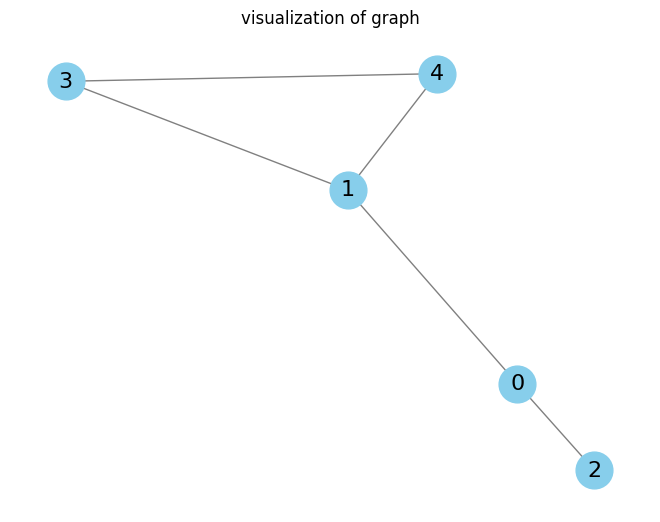

In [105]:
#인접행렬로 그래프 얻기 (numpy array)
F=nx.from_numpy_array(adj)
nx.draw(F,with_labels=True, node_color='skyblue', edge_color='gray', node_size=700, font_size=16)
plt.title("visualization of graph")
plt.show()

In [109]:
'''
(가장 간단하지만 노드의 속성
이나 weight를 제외한 링크의
속성을 저장할 수 없음)
'''
#edgelist 형식으로 저장
nx.write_edgelist(G,'G.edgelist')




'''
graphml 형식으로 저장 (노드의 속성, 링크의 속성 등
모든 정보를 저장할 수 있으나
용량이 큼)
'''
#graphml 형식으로 저장
nx.write_graphml(G,'G.graphml')


In [112]:
#edgelist 형식 읽기
G1=nx.read_edgelist('G.edgelist')
print(G1)

Graph with 100 nodes and 736 edges
